<a href="https://colab.research.google.com/github/Xenofon-Chiotopoulos/HPC-Assignments-/blob/main/HPC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The slowest run took 7.49 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 330 µs per loop
1000 loops, best of 5: 1.04 ms per loop
100 loops, best of 5: 2 ms per loop
100 loops, best of 5: 3.73 ms per loop
100 loops, best of 5: 7.65 ms per loop
100 loops, best of 5: 12.9 ms per loop
10 loops, best of 5: 20.4 ms per loop
10 loops, best of 5: 28.7 ms per loop
10 loops, best of 5: 41.2 ms per loop
10 loops, best of 5: 55.7 ms per loop
The slowest run took 8859.67 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 165 µs per loop
1000 loops, best of 5: 1.44 ms per loop
100 loops, best of 5: 4.58 ms per loop
100 loops, best of 5: 11.5 ms per loop
10 loops, best of 5: 23.9 ms per loop
10 loops, best of 5: 44.5 ms per loop
10 loops, best of 5: 74.2 ms per loop
10 loops, best of 5: 119 ms per loop
10 loops, best of 5: 170 ms per loop
1 loop, best of 5: 209 ms per loop
T

'\na = np.random.randn(100,100)\nb = np.random.randn(100,100)\n\n\ntimeit_2 = %timeit -o matrix_product_jit(a,b)\ntimeit_3 = %timeit -o matrix_product_cashe_jit(a,b)\ntimeit_4 = %timeit -o matrix_product_cashe_jit_fastmath(a,b)\ntimeit_5 = %timeit -o matrix_product_blocking(a,b)\n#print(timeit_numpy, timeit_1, timeit_2, timeit_3, timeit_4, timeit_5)\n\n\n\na = np.random.randn(100, 100)\nb = np.random.randn(100, 100)\n\nc_actual = matrix_product(a, b)\nc_expected = a @ b\n\nerror = np.linalg.norm(c_actual - c_expected) / np.linalg.norm(c_expected)\nprint(f"The error is {error}.")\n\ntimeit_result = %timeit -o matrix_product_cashe_jit_fastmath(a, b)\nprint(timeit_result.best)\ntimeit_result_np = %timeit -o a @ b\nprint(timeit_result_np.best)\nprint(timeit_result.best/timeit_result_np.best)\n'

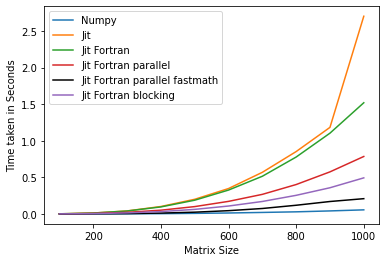

In [4]:
import numpy as np
from numba import njit, jit
from numba import prange
import matplotlib.pyplot as plt

def matrix_product(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    m = mat_a.shape[0]
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0])

    ncol = mat_a.shape[1]

    mat_c = np.zeros((m, n), dtype=np.float64)

    for row_ind in range(m):
        for col_ind in range(n):
            for k in range(ncol):
                mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c


@njit(parallel = True, fastmath = True)
def matrix_product_cashe_jit_fastmath(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    
    m = mat_a.shape[0]
    
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0])

    ncol = mat_a.shape[1]


    #mat_a = np.asfortranarray(mat_a)
    mat_b = np.asfortranarray(mat_b)
    mat_c = np.zeros((m, n), dtype=np.float64)


    for row_ind in prange(m):
        for col_ind in range(n):
           for k in range(ncol):
              mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c

@njit(parallel = True)
def matrix_product_cashe_jit(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    
    m = mat_a.shape[0]
    
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0])

    ncol = mat_a.shape[1]


    #mat_a = np.asfortranarray(mat_a)
    mat_b = np.asfortranarray(mat_b)
    mat_c = np.zeros((m, n), dtype=np.float64)


    for row_ind in prange(m):
        for col_ind in range(n):
           for k in range(ncol):
              mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c

@njit
def matrix_product_jit(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    
    m = mat_a.shape[0]
    
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0])

    ncol = mat_a.shape[1]


    #mat_a = np.asfortranarray(mat_a)
    #mat_b = np.asfortranarray(mat_b)
    mat_c = np.zeros((m, n), dtype=np.float64)


    for row_ind in range(m):
        for col_ind in range(n):
           for k in range(ncol):
              mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c   

@njit(parallel = True)
def matrix_product_jit_fortran(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    
    m = mat_a.shape[0]
    
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0])

    ncol = mat_a.shape[1]


    #mat_a = np.asfortranarray(mat_a)
    mat_b = np.asfortranarray(mat_b)
    mat_c = np.zeros((m, n), dtype=np.float64)


    for row_ind in range(m):
        for col_ind in range(n):
           for k in range(ncol):
              mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c   


@njit(parallel = True, fastmath = True)
def matrix_product_blocking(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    
    m = mat_a.shape[0]

    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0])

    ncol = mat_a.shape[1]
    mat_b = np.asfortranarray(mat_b)
    mat_c = np.zeros((m, n), dtype=np.float64)
    b = 4
    test = int(len(mat_a)/b) 
    for row_ind_test in prange(test):
        for col_ind_test in range(test):
           for k_test in range(test):
              for row_ind in range((row_ind_test-1)*b,row_ind_test*b):
                for col_ind in range((col_ind_test-1)*b, col_ind_test*b):
                  for k in range((k_test-1)*b,k_test*b):
                    mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c 

matrix_size = np.zeros(1100)
numpy_list = np.zeros(1100)
for i in range(100,1100,100):
  matrix_size[i] = i
  a = np.random.randn(i,i)
  b = np.random.randn(i,i)
  timeit_numpy = %timeit -o a @ b 
  numpy_list[i] = timeit_numpy.best
numpy_list = numpy_list[numpy_list != 0]
matrix_size = matrix_size[matrix_size != 0] 

timeit_4_list = np.zeros(1100)
for i in range(100,1100,100):
  a = np.random.randn(i,i)
  b = np.random.randn(i,i)
  timeit_4 = %timeit -o matrix_product_cashe_jit_fastmath(a,b)
  timeit_4_list[i] = timeit_4.best
timeit_4_list = timeit_4_list[timeit_4_list != 0]

timeit_5_list = np.zeros(1100)
for i in range(100,1100,100):
  a = np.random.randn(i,i)
  b = np.random.randn(i,i)
  timeit_5 = %timeit -o matrix_product_blocking(a,b)
  timeit_5_list[i] = timeit_5.best
timeit_5_list = timeit_5_list[timeit_5_list != 0]

timeit_3_list = np.zeros(1100)
for i in range(100,1100,100):
  a = np.random.randn(i,i)
  b = np.random.randn(i,i)
  timeit_3 = %timeit -o matrix_product_cashe_jit(a,b)
  timeit_3_list[i] = timeit_3.best
timeit_3_list = timeit_3_list[timeit_3_list != 0]

timeit_2_list = np.zeros(1100)
for i in range(100,1100,100):
  a = np.random.randn(i,i)
  b = np.random.randn(i,i)
  timeit_2 = %timeit -o matrix_product_jit(a,b)
  timeit_2_list[i] = timeit_2.best
timeit_2_list = timeit_2_list[timeit_2_list != 0]


timeit_1_list = np.zeros(1100)
for i in range(100,1100,100):
  a = np.random.randn(i,i)
  b = np.random.randn(i,i)
  timeit_1 = %timeit -o matrix_product_jit_fortran(a,b)
  timeit_1_list[i] = timeit_1.best
timeit_1_list = timeit_1_list[timeit_1_list != 0]


plt.plot(matrix_size, numpy_list, label= 'Numpy')

plt.plot(matrix_size, timeit_2_list, label= 'Jit')
plt.plot(matrix_size, timeit_1_list, label= 'Jit Fortran')
plt.plot(matrix_size, timeit_3_list, label= 'Jit Fortran parallel')
plt.plot(matrix_size, timeit_4_list, label= 'Jit Fortran parallel fastmath', color = 'k')
plt.plot(matrix_size, timeit_5_list, label= 'Jit Fortran blocking')

plt.xlabel('Matrix Size')
plt.ylabel('Time taken in Seconds')
plt.legend()

plt.show



'''
a = np.random.randn(100,100)
b = np.random.randn(100,100)


timeit_2 = %timeit -o matrix_product_jit(a,b)
timeit_3 = %timeit -o matrix_product_cashe_jit(a,b)
timeit_4 = %timeit -o matrix_product_cashe_jit_fastmath(a,b)
timeit_5 = %timeit -o matrix_product_blocking(a,b)
#print(timeit_numpy, timeit_1, timeit_2, timeit_3, timeit_4, timeit_5)



a = np.random.randn(100, 100)
b = np.random.randn(100, 100)

c_actual = matrix_product(a, b)
c_expected = a @ b

error = np.linalg.norm(c_actual - c_expected) / np.linalg.norm(c_expected)
print(f"The error is {error}.")

timeit_result = %timeit -o matrix_product_cashe_jit_fastmath(a, b)
print(timeit_result.best)
timeit_result_np = %timeit -o a @ b
print(timeit_result_np.best)
print(timeit_result.best/timeit_result_np.best)
'''

In [ ]:
import numpy as np
times_list = []

#for i in range(100,100,100):
a = np.random.randn(100,100)
b = np.random.randn(100,100)
timeit_numpy = %timeit -o a @ b 
timeit_1 = %timeit -o matrix_product(a,b)
timeit_2 = %timeit -o matrix_product_jit(a,b)
timeit_3 = %timeit -o matrix_product_cashe_jit(a,b)
timeit_4 = %timeit -o matrix_product_cashe_jit_fastmath(a,b)
timeit_5 = %timeit -o matrix_product_blocking(a,b)
print(timeit_numpy, timeit_1, timeit_2, timeit_3, timeit_4, timeit_5)
